##### Name: Bhavana Chodavarapu

Description of Assignment:

- The objective of this assignment is to analyze datasets related to user behavior, cooking preferences, and order trends.
- You will work with three datasets: UserDetails, CookingSessions, and OrderDetails.
- The task involves cleaning and merging the data, analyzing the relationship between cooking sessions and user orders, identifying popular dishes, and exploring demographic factors that influence user behavior.
- Additionally, you will create visualizations to showcase key insights and write a report summarizing your findings and business recommendations.
- The final project should be organized in a GitHub repository with all relevant files and a README.md.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = 'Data Analyst Intern Assignment - Excel.xlsx'

In [15]:
UserDetails = pd.read_excel(file_path, sheet_name ='UserDetails.csv')
CookingSessions = pd.read_excel(file_path, sheet_name = 'CookingSessions.csv')
OrderDetails = pd.read_excel(file_path, sheet_name = 'OrderDetails.csv')

In [29]:
UserDetails.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [28]:
CookingSessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [27]:
OrderDetails.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [21]:
UserDetails.shape

(10, 9)

In [23]:
CookingSessions.shape

(16, 8)

In [25]:
OrderDetails.shape

(16, 10)

### Data Cleaning

##### UserDetails Table

In [20]:
# Handling Missing Values
UserDetails.isna().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

In [30]:
UserDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes


In [31]:
UserDetails['Favorite Meal'].value_counts()

Favorite Meal
Dinner       5
Lunch        3
Breakfast    2
Name: count, dtype: int64

In [32]:
UserDetails['Location'].value_counts()

Location
New York         1
Los Angeles      1
Chicago          1
San Francisco    1
Seattle          1
Austin           1
Boston           1
Miami            1
Dallas           1
Phoenix          1
Name: count, dtype: int64

##### CookingSessions Table

In [33]:
CookingSessions.isna().sum()

Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

In [34]:
CookingSessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session ID       16 non-null     object        
 1   User ID          16 non-null     object        
 2   Dish Name        16 non-null     object        
 3   Meal Type        16 non-null     object        
 4   Session Start    16 non-null     datetime64[ns]
 5   Session End      16 non-null     datetime64[ns]
 6   Duration (mins)  16 non-null     int64         
 7   Session Rating   16 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In [35]:
cols = ['Dish Name', 'Meal Type']
for i in cols:
    print(CookingSessions[i].value_counts())
    print('******************')

Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64
******************
Meal Type
Dinner       8
Lunch        5
Breakfast    3
Name: count, dtype: int64
******************


##### OrderDetails Table

In [36]:
OrderDetails.isna().sum()

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64

In [37]:
OrderDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      16 non-null     int64         
 1   User ID       16 non-null     object        
 2   Order Date    16 non-null     datetime64[ns]
 3   Meal Type     16 non-null     object        
 4   Dish Name     16 non-null     object        
 5   Order Status  16 non-null     object        
 6   Amount (USD)  16 non-null     float64       
 7   Time of Day   16 non-null     object        
 8   Rating        14 non-null     float64       
 9   Session ID    16 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.4+ KB


In [40]:
OrderDetails['Rating'].fillna(0, inplace = True)

In [41]:
OrderDetails.isna().sum()

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64

In [39]:
cols_OD = ['Meal Type', 'Dish Name', 'Order Status', 'Time of Day']
for i in cols_OD:
    print(OrderDetails[i].value_counts())
    print('**************')

Meal Type
Dinner       8
Lunch        5
Breakfast    3
Name: count, dtype: int64
**************
Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64
**************
Order Status
Completed    14
Canceled      2
Name: count, dtype: int64
**************
Time of Day
Night      8
Day        5
Morning    3
Name: count, dtype: int64
**************


### Data Merging

In [44]:
MergeData = OrderDetails.merge(CookingSessions, on = ['User ID', 'Dish Name', 'Meal Type', 'Session ID'], how = 'left')
FinalData = MergeData.merge(UserDetails, on = 'User ID', how = 'left')

In [46]:
FinalData.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID,...,Duration (mins),Session Rating,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001,...,30,4.5,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002,...,20,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,0.0,S003,...,40,4.8,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004,...,30,4.2,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005,...,15,4.7,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10


### Analysis

In [47]:
# Analysing the relationship between cooking sessions and user orders

cor = FinalData[['Session Rating', 'Rating']].corr()
print(cor)

                Session Rating    Rating
Session Rating        1.000000  0.070846
Rating                0.070846  1.000000


In [48]:
# Identifying popular dishes

popular_dishes = FinalData['Dish Name'].value_counts().head(10)
print(popular_dishes)

Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


In [49]:
# Exploring demographic factors that influence user behaviors
FinalData['Age Group'] = pd.cut(FinalData['Age'], bins=[18, 30, 40, 50, 60], labels=['18-30', '31-40', '41-50', '51-60'])
orders_by_age_group = FinalData.groupby('Age Group')['Order ID'].count()
print(orders_by_age_group)

Age Group
18-30    8
31-40    5
41-50    3
51-60    0
Name: Order ID, dtype: int64


### Visualization

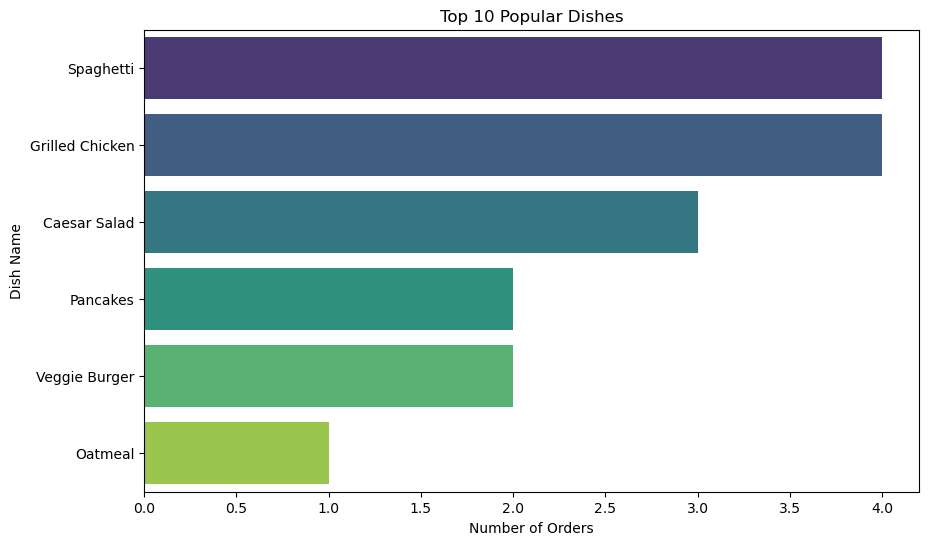

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='viridis')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Number of Orders')
plt.ylabel('Dish Name')
plt.show()

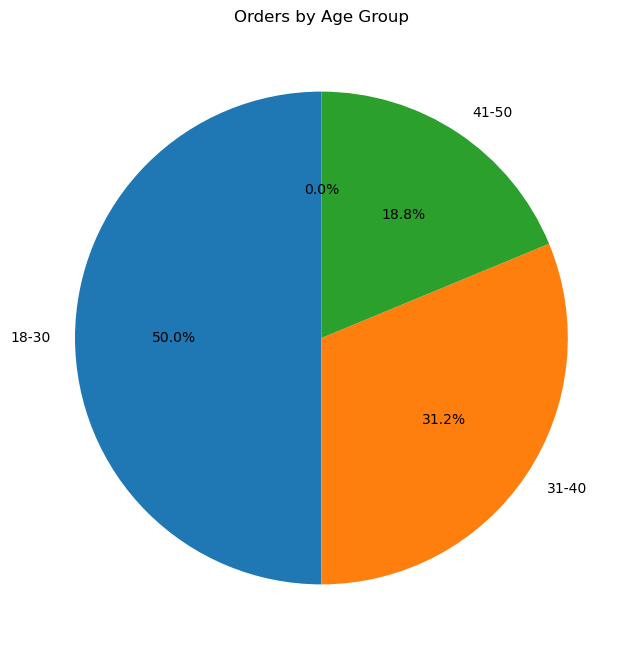

In [51]:
orders_by_age_group.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), legend=False)
plt.title('Orders by Age Group')
plt.ylabel('')
plt.show()

- Dishes like Spaghetti, Grilled Chicken and Caesar Salad are among the most ordered items, indicating their popularity.
- A positive correlation between Session Rating and Order Rating suggests that well-rated cooking sessions lead to higher order satisfaction. This emphasizes the importance of engaging cooking experiences.
- Users aged 18-30 make up the largest proportion of orders, indicating that marketing efforts should target this age group.